<a href="https://colab.research.google.com/github/NYU-IEP-2022-3-Classroom/lab6-data-repository-player1notfound/blob/main/LabAnalysis6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As in other assignments, run this first code block to import necessary libraries

In [2]:
# necessary libraries
import numpy as np
import matplotlib.pyplot as plt


#Create and upload your data array

Create a spreadsheet (use google sheets, ms excel, whatever you want) duplicating the table in your lab book. Include a header row. Save the spreadsheet in tab delimited text format as lab6data.txt (Also save a copy in the native format - e.g. .xlsx for excel). If you use google sheets, download a "tab separated value" file then change the ".tsv" extension to ".txt"

**Make sure you use a consistent unit for the energy** IE if the energy change is 2.14 mJ, you could either enter .00214 (units are Joules) or 2.14 (units are mJ) but use the same choice throughout. 

Upload this spreadsheet to your lab6-data-repository (https://github.com/NYU-IEP-2022-3-Classroom/lab6-data-repository-yourgithubname) archive on github

Then change the line that starts !wget to use the correct repository name

When you run this, you should see your data displayed

In [3]:
!wget -nc https://raw.githubusercontent.com/NYU-IEP-2022-3-Classroom/lab6-data-repository-player1notfound/main/lab6data.txt
!more lab6data.txt

--2023-04-01 01:45:00--  https://raw.githubusercontent.com/NYU-IEP-2022-3-Classroom/lab6-data-repository-player1notfound/main/lab6data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1261 (1.2K) [text/plain]
Saving to: ‘lab6data.txt’

lab6data.txt        100%[===================>]   1.23K  --.-KB/s    in 0s      

2023-04-01 01:45:00 (39.2 MB/s) - ‘lab6data.txt’ saved [1261/1261]

phase	duration	avg energy	#1/2 cycles	elapsed time	lifetime
(sl)	lifetime(amp^2)	energy change	coil energy	energy loss	energy c
hange+energy loss/coil energy
20	5	4.75	121	129.166	698	698	2.453	3.6	0.73	
0.82
20	5	2.7	120	127.1	698	698	2.4	3.5	0.69	
0.75
20	5	3.6	121	127.1	698	698	2.1	3.2	0.61	
0.82
20	7	5.4	120	127.1	739	739	3.6	4.9	0.728	
0.87
20	7	4.5	120	127.1	739	739	3.3	4

#Load the data

The load command below assumes you created the 11 columns listed in the lab handout in the order specified,  that the data file is named "lab6data.txt" and that there is one header row.  If that's not right, edit the line below to make it align with what you did. If you saved the data in csv (comma separated values), add the keywork argument `delimeter = ','` to the arguments of loadtxt. 

In [4]:
phase, duration, avgnrg, numhalfcycles, elapsedtime, lifetime_s, lifetime_asq, deltanrg, coilnrg, nrgloss,coiladj  = np.loadtxt('lab6data.txt', skiprows = 1, unpack=True)

# Make a scatter plot of calculated coil energy vs calculated mechanical energy and fit the data to a line

##Calibrations
We'd like to know if there's a simple scaling relation between the measured electrical and mechanical energies. IE mechanical = a * electrical, where maybe a = 80%. Ideally, this scaling relation would represent a **calibration factor** -- i.e. it would exactly map the measured to true value. These kinds of calibrations are common in laboratory science.

For instance, a common way to measure temperatures near room temperature is to use a device called a thermistor. These are very precise, but not accurate - they measure changes of tenths of a degree easily but can be off by a degree or two overall. So before using a thermistor, you calibrate it by measuring the temperature of an ice/water mixture (which you know to be 0C) and boiling water (which you know to be 100C), then apply a correction to all the measured values. 

##Calibrating your setup

Let's see if we can find a simple relation between the amount of electrical energy you added to the bob and the amount of mechanical energy. 

the total electical energy the pico calculated is stored in `coilnrg`

the change in the bob's energy is stored in `deltanrg`

the calculated energy lost to damping is stored in `nrgloss`

the mechanical energy imparted to the bob is the change in the bob's energy + the energy lost due to damping (for exaample, if you were putting in exactly what was needed to overcome damping, then the bob's energy change would be 0)

1. Please make a scatter plot with the calculated electrical energy on the x-axis and the calculated energy imparted to the bob on the y-axis. Use blue dots. Don't connect the lines. Label the axes. Make sure you specify whether energy is in Joules or milliJoules, etc. 

Now we'd like to know if there's a simple scaling relation between the calculated electrical and mechanical energies. IE mechanical = a * electrical, where maybe a = 80%. 

`np.polyfit(x,y,1)` will fit the data to a line, but the intercept won't necessarily be through 0. Here physics tells us that if the electrical energy is 0, the mechanical energy added must also be 0. So we need to fit the line $y = a x$, not $y = a x + b$. Fortunately, this is a straightfoward problem. The least-squares solution is

$a = \frac{\sum_i x_i y_i}{\sum_i x_i^2}$

2. Find the best (least-squares) fit for the scaling factor. Draw a black dashed line matching this fit through the data. Title the plot with the scaling factor.


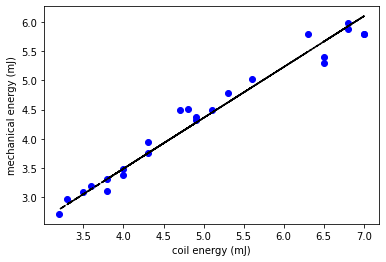

In [11]:
## your answer here
plt.scatter(coilnrg, deltanrg+nrgloss,color='blue')
plt.xlabel('coil energy (mJ)')
plt.ylabel('mechanical energy (mJ)')
a=np.sum(coilnrg*(deltanrg+nrgloss))/np.sum(coilnrg**2)
x=np.linspace(np.min(coilnrg), np.max(coilnrg), 100)
y=a*x
plt.plot(coilnrg,a*coilnrg,'black',linestyle='--')
plt.show()

#Make a scatter plot of calculated coil energy per $\frac{1}{2}$ cycle vs calculated mechanical energy per $\frac{1}{2}$ and fit the data to a line

The same as above, but this time divide all the energies by the number of half cycles (`numhalfcycles`). 


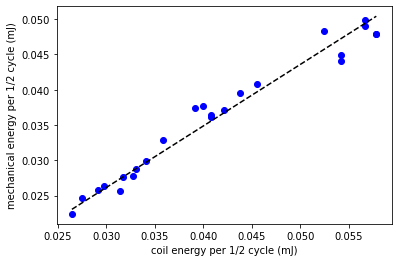

In [12]:
## your answer here
elec=coilnrg/numhalfcycles
mech=(deltanrg/numhalfcycles)+(nrgloss/numhalfcycles)
plt.scatter(elec, mech, color='blue')
plt.xlabel('coil energy per 1/2 cycle (mJ)')
plt.ylabel('mechanical energy per 1/2 cycle (mJ)')
a=np.sum(coilnrg*(deltanrg+nrgloss))/np.sum(coilnrg**2)
x=np.linspace(np.min(elec), np.max(elec), 100)
y=a*x
plt.plot(x,y,'black',linestyle='--')
plt.show()

#Look for systematics

If everything is going well, we wouldn't expect the scaling to depend on things like the size of the pulse or what fraction of the energy is lost to damping. 

1. remake the scatter plot above (per half cycle), including the fit line, but this time use a blue marker if the per energy pulse is above the median (top half) and a red marker if the per energy pulse is below the median (bottom half)

2. Make a new figure. remake the scatter plot above (per half cycle), including the fit line, but this time use a blue marker if the ratio of energy loss to total energy change is above the median (top half) and a red marker if the per energy pulse is below he median (bottom half)

hints: [you can use true/false arrays to index another array](https://numpy.org/doc/stable/user/basics.indexing.html#boolean-or-mask-index-arrays) For instance if x and y are numpy arrays of the same size, `y[x<10]` gives you all values of `y` for which `x < 10`.

to calculate the median, use [np.median](https://numpy.org/doc/stable/reference/generated/numpy.median.html)



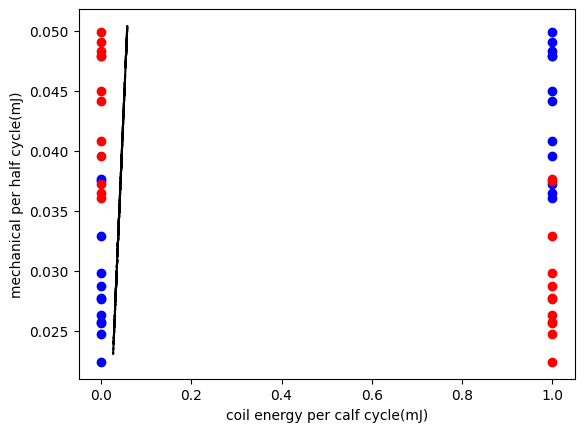

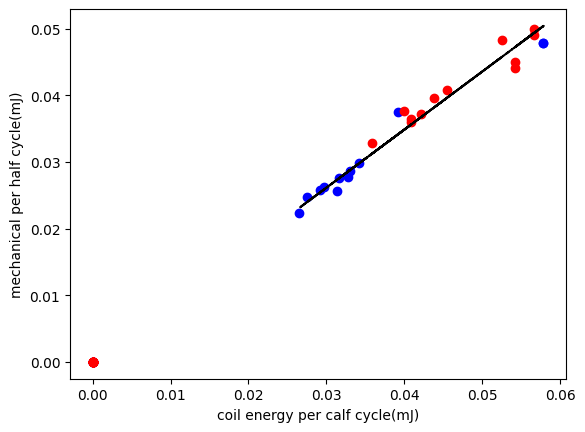

In [8]:
## your code here
elec=coilnrg/(numhalfcycles)
mech=(deltanrg/(numhalfcycles))+(nrgloss/(numhalfcycles))
scaling=np.sum(elec*mech) /np.sum(elec**2)
median=np.median(elec)
abovemedian=elec>median
belowmedian=elec<median
plt.scatter(abovemedian, mech,color='blue')
plt.scatter(belowmedian, mech,color='red')
plt.plot(elec,elec*scaling,'--k')
plt.xlabel('coil energy per calf cycle(mJ)')
plt.ylabel('mechanical per half cycle(mJ)')
plt.show()

elec=coilnrg/(numhalfcycles)
mech=(deltanrg+nrgloss)/(numhalfcycles)
lossratio=nrgloss/(deltanrg+nrgloss)
medloss=np.median(lossratio)
abovemedian=lossratio>=medloss
belowmedian=lossratio<medloss
scaling=np.sum(elec*mech) /np.sum(elec**2)
plt.plot(elec,elec*scaling,'--k')
plt.scatter(abovemedian*elec, abovemedian*mech,color='blue')
plt.scatter(belowmedian*elec, belowmedian*mech,color='red')
plt.xlabel('coil energy per calf cycle(mJ)')
plt.ylabel('mechanical per half cycle(mJ)')
plt.show()

## Question - answer below

Is there a pattern to either of these scatter plots? Is one data type consistently above the fit line and the other below it, or are they all spread out?
In the first and  second scatter  plot,  the red and blue markers  are evenly distributed along  the black line which indicates that the scaling factors does not  depend on the size of pulse nor fraction of energy lost to damping. 

#Plot the residuals

Make the scatter plot per half cycle again, but this time subtract the linear fit from the y-data. So you should have a plot of $(x, y-ax)$ where $x$ is the calculated electrical energy, $y$ is the calculated mechanical energy added, and $a$ is the best-fit scaling factor

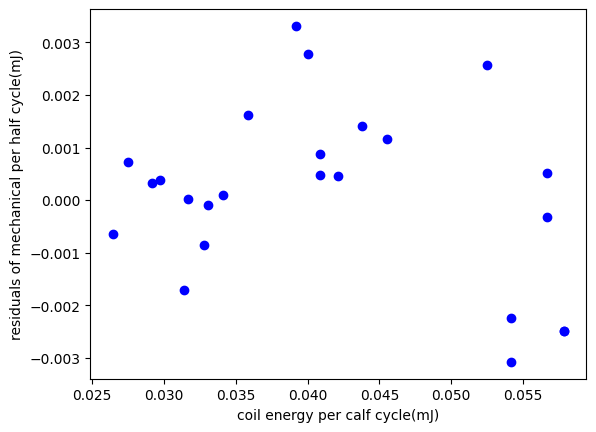

In [9]:
## your code here
elec=coilnrg/(numhalfcycles)
mech=(deltanrg/(numhalfcycles))+(nrgloss/(numhalfcycles))
scaling=np.sum(elec*mech) /np.sum(elec**2)
residuals=mech-scaling*elec
plt.scatter(elec,residuals,color='blue')
plt.xlabel('coil energy per calf cycle(mJ)')
plt.ylabel('residuals of mechanical per half cycle(mJ)')
plt.show()

#Make a histogram of fractional error

1. Make a histogram of the fractional error: $\frac{y - ax}{y}$, where $x$ is the calculated electrical energy, $y$ is the calculated mechanical energy added, and $a$ is the best-fit scaling factor

2. Calculate the root mean square fractional error (that is $\sqrt{\frac{1}{N}\sum_i (\frac{y_i - ax_i}{y_i})^2}$. Why did I tell you to use this instead of the standard deviation? What's the difference? 

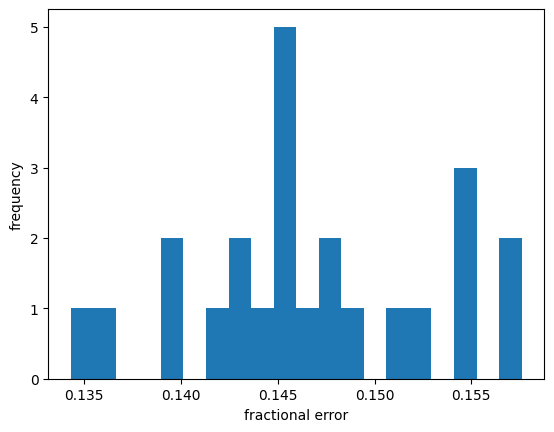

0.1469108896612348


In [14]:
##your answer here
elec=coilnrg/(numhalfcycles)
mech=(deltanrg/(numhalfcycles))+(nrgloss/(numhalfcycles))
scaling=np.sum(elec*mech) /np.sum(elec**2)
error=(elec-scaling*elec)/mech
plt.hist(error, bins=20)
plt.xlabel('fractional error')
plt.ylabel('frequency')
plt.show()

root=np.sqrt(np.mean(error**2))
print(root)

answer "Why did I tell you to use this instead of the standard deviation? What's the difference?" here: 

The standard deviation gives more weight to larger deviations whereas the RMS error measures the discrepancies between predicted and actual values. All errors are weighted equally regardless of their size and sign.


# Analysis

1. Can the electrical energy be used to measure the mechanical energy imparted to the bob?
2. How accurately do you think we can estimate the amount of energy added? What limits this accuracy?
3. Do you see any evidence of systematic errors? If so, what do you see? What might you do to correct these? 


1. The electrical energy can be used to measure the mechanical energy imparted to the bob but it is subject to potential sources of error and limitations.

2. It is possible to reach a reasonable level of accuracy but it also depends on several factors. Systematic errors or external influences can greatly limits this accuracy. Air resistance or fluctuations in the magnetic field contributed to fluctuations in mechanical energy. There is a possibility of imprecise measurements of electrical or mechanical energy displacement.

3. There is evidence of systematic errors as some deviations exists from the best-fit line in scatter plots. To correct these potential sources of error, improving our measurements and increasing the system's stability could refine our calculations. 